In [66]:
import twint
import re
import pandas as pd
import nest_asyncio
nest_asyncio.apply()

In [67]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re  
import spacy
nlp = spacy.load('en_core_web_lg')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Brenda\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Brenda\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [68]:
c = twint.Config()
c.Limit = 1000
c.Lang = "en"
c.Search = ["covid", "vaccine"]
c.Since = "2021-01-01"
c.Until = "2021-01-31"
#c.Location = True
#c.Geo = "42.897541,-82.7059659,1000km"
c.Store_csv = True
c.Output = "data.csv"
twint.run.Search(c)

In [69]:
df = pd.read_csv("data.csv")
df2 = df['tweet']
df2

0        @BreitbartNews Fixed the headline for you, "Wi...
1        if you think autism is worse than covid and fa...
2        Casino Mogul Charged After Getting COVID-19 Va...
3        @yashar Also, if Covid is allowed to run unche...
4        A good COVID-19 vaccine is good enough   https...
5        @richsignorelli @Whit_8787 @Publix And insist ...
6        Reality bites. The EU is a hostile entity, it ...
7        The demonstrators included members of anti-vac...
8        @GinnyinSC @Mikel_Jollett Dang, hit reply too ...
9        @melanatedmomma If you took the COVID vaccine ...
10       @ayo_olah Please read what i replied to  @CNNA...
11       The Covid vaccines be like ei turn battle of w...
12       Congressman who had second COVID-19 vaccine do...
13       @Publix is an employee-owned company. Would li...
14       Canadian couple who traveled more than 1,000 m...
15       @pianoman123046 @GovHowardDean Yet they are ex...
16        https://t.co/ez1AxakOmy  We must continue to .

In [70]:

all_sentences = []

for word in df2:
    all_sentences.append(word)

all_sentences
#df1 = df.to_string()

#df_split = df1.split()

#df_split
lines = list()
for line in all_sentences:    
    words = line.split()
    for w in words: 
       lines.append(w)


print(lines)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [71]:
#Remove twitter users

for word in lines:
    firstChar = word[0]
    if (firstChar == '@'):
        lines.remove(word)
    

In [72]:
#Removing Punctuation

lines = [re.sub(r'[^A-Za-z0-9]+', '', x) for x in lines]

lines

lines2 = []

for word in lines:
    if word != '':
        lines2.append(word)

In [73]:
#This is stemming the words to their root
from nltk.stem.snowball import SnowballStemmer

# The Snowball Stemmer requires that you pass a language parameter
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in lines2:
    stem.append(s_stemmer.stem(word))
    
stem

['fix',
 'the',
 'headlin',
 'for',
 'you',
 'with',
 'the',
 'avail',
 'of',
 'the',
 'vaccin',
 'now',
 'in',
 'the',
 'hand',
 'of',
 'nyc',
 'due',
 'to',
 'biden',
 'priorit',
 'of',
 'covid',
 'as',
 'the',
 'administr',
 '1',
 'prioriti',
 'restrict',
 'be',
 'lift',
 'dose',
 'now',
 'be',
 'deliv',
 'to',
 'new',
 'yorker',
 'at',
 'scale',
 'if',
 'you',
 'think',
 'autism',
 'is',
 'wors',
 'than',
 'covid',
 'and',
 'fals',
 'believ',
 'the',
 'covid',
 'vaccin',
 'will',
 'give',
 'you',
 'autism',
 'id',
 'like',
 'to',
 'share',
 'some',
 'word',
 'with',
 'you',
 'the',
 'word',
 'are',
 'fuck',
 'you',
 'written',
 'on',
 'my',
 'knuckl',
 'and',
 'ill',
 'be',
 'share',
 'them',
 'with',
 'your',
 'face',
 'casino',
 'mogul',
 'charg',
 'after',
 'get',
 'covid19',
 'vaccin',
 'meant',
 'for',
 'indigen',
 'local',
 'httpstcocempjypmzd',
 'via',
 'yashar',
 'also',
 'if',
 'covid',
 'is',
 'allow',
 'to',
 'run',
 'uncheck',
 'it',
 'can',
 'mutat',
 'amp',
 'some',
 

In [74]:
#Removing all Stop Words

stem2 = []

for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

stem2

['fix',
 'headlin',
 'avail',
 'vaccin',
 'hand',
 'nyc',
 'biden',
 'priorit',
 'covid',
 'administr',
 '1',
 'prioriti',
 'restrict',
 'lift',
 'dose',
 'deliv',
 'new',
 'yorker',
 'scale',
 'think',
 'autism',
 'wors',
 'covid',
 'fals',
 'believ',
 'covid',
 'vaccin',
 'autism',
 'id',
 'like',
 'share',
 'word',
 'word',
 'fuck',
 'written',
 'knuckl',
 'ill',
 'share',
 'face',
 'casino',
 'mogul',
 'charg',
 'covid19',
 'vaccin',
 'meant',
 'indigen',
 'local',
 'httpstcocempjypmzd',
 'yashar',
 'covid',
 'allow',
 'run',
 'uncheck',
 'mutat',
 'amp',
 'mutat',
 'end',
 'resist',
 'vaccin',
 'pandem',
 'longer',
 'need',
 'everybodi',
 'vaccin',
 'prevent',
 'danger',
 'mutat',
 'end',
 'pandem',
 'good',
 'covid19',
 'vaccin',
 'good',
 'httpstcobx3iiaiwso',
 'whit8787',
 'insist',
 'investig',
 'desanti',
 'publix',
 'florida',
 'covid',
 'vaccin',
 'shadi',
 'deal',
 'realiti',
 'bite',
 'eu',
 'hostil',
 'entiti',
 'friend',
 'brexitbritain',
 'covidvaccin',
 'article16',
 

In [75]:
df = pd.DataFrame(stem2)

df = df[0].value_counts()

#df
#df['freq'] = df.groupby(0)[0].transform('count')
#df['freq'] = df.groupby(0)[0].transform('count')
#df.sort_values(by = ('freq'), ascending=False)

In [76]:
#This will give frequencies of our words

from nltk.probability import FreqDist

freqdoctor = FreqDist()

for words in df:
    freqdoctor[words] += 1

freqdoctor


FreqDist({2: 4969, 6: 1402, 5: 1133, 1: 1114, 3: 830, 4: 581, 8: 268, 7: 216, 10: 189, 12: 184, ...})

In [77]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

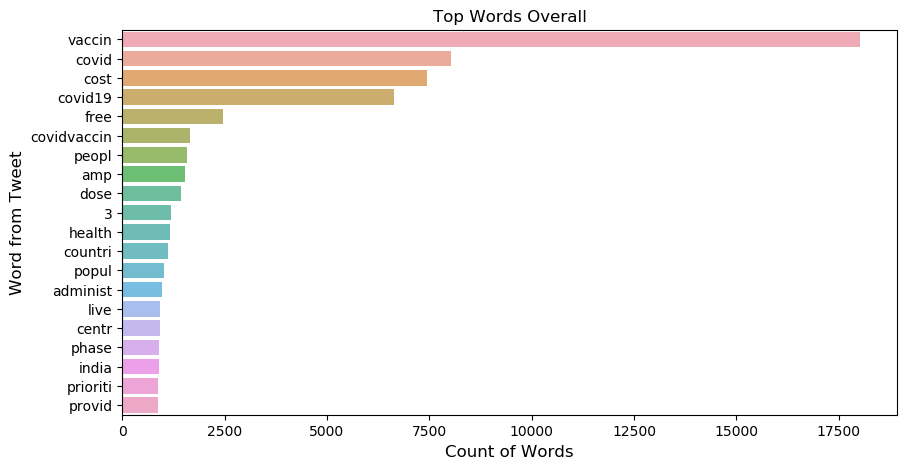

In [78]:
#This is a simple plot that shows the top 20 words being used
#df.plot(20)

df = df[:20,]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.ylabel('Word from Tweet', fontsize=12)
plt.xlabel('Count of Words', fontsize=12)
plt.show()